In [1]:
import json
import random
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# Unduh resource NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive') # Sesuaikan path direktori
%cd /content/drive/MyDrive/kuliah/Semester 4/Penambangan Data/ChatbotML-CountVectAndMNB-main/

Mounted at /content/drive
/content/drive/MyDrive/kuliah/Semester 4/Penambangan Data/ChatbotML-CountVectAndMNB-main


In [3]:
# Load dataset
with open("Data/e-commerce.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Preprocessing helper
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

# Siapkan data training
X = []
y = []
responses = {}
for intent in data["intents"]:
    tag = intent["tag"]
    for pattern in intent["patterns"]:
        X.append(preprocess(pattern))
        y.append(tag)
    responses[tag] = intent["responses"]
print(type(X))
# Cek Data
print(len(X), len(y))
for i in range(16):
    print(X[i], '\t', y[i])
print('...')
for i in range(4000, 4016):
    print(X[i], '\t', y[i])
print('...')
for i in range(len(X)-1, len(X)-21, -1):
    print(X[i], '\t', y[i])

<class 'list'>
8026 8026
would possibl cancel order made 	 cancel_order
cancel order 	 cancel_order
need assist cancel last order made 	 cancel_order
problem cancel order made 	 cancel_order
know cancel order made 	 cancel_order
help cancel order made 	 cancel_order
would like know order cancel 	 cancel_order
could help cancel order 	 cancel_order
know cancel order made 	 cancel_order
help cancel last order 	 cancel_order
know cancel last order made 	 cancel_order
need assist cancel order made 	 cancel_order
inform cancel order 	 cancel_order
would like cancel order 	 cancel_order
need assist cancel order 	 cancel_order
need assist cancel order made 	 cancel_order
...
want help check option deliveri offer 	 delivery_options
would like know deliveri option 	 delivery_options
help check deliveri option 	 delivery_options
check deliveri option choos 	 delivery_options
want inform deliveri option 	 delivery_options
could show deliveri option offer 	 delivery_options
could show option deliv

In [4]:
# Coba count vectorizer
import pandas as pd

print(type(X))
vectorizer = CountVectorizer()
text_vect = vectorizer.fit_transform(X)
vocabs = (vectorizer.get_feature_names_out())
print(set(y))
pd.DataFrame(text_vect.toarray(), columns=vocabs)


<class 'list'>
{'check_invoice', 'check_cancellation_fee', 'registration_problems', 'contact_human_agent', 'get_refund', 'change_order', 'newsletter_subscription', 'place_order', 'edit_account', 'get_invoice', 'check_payment_methods', 'delivery_period', 'cancel_order', 'set_up_shipping_address', 'complaint', 'change_shipping_address', 'review', 'payment_issue', 'switch_account', 'track_refund', 'create_account', 'check_refund_policy', 'recover_password', 'track_order', 'delete_account', 'delivery_options', 'contact_customer_service'}


,abuot,accdss,accept,access,accesw,accont,acconut,accouint,accounmt,accounnt,...,wit,withdraw,witth,word,work,would,wrong,ya,yet,youur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Buat pipeline: CountVectorizer + MNB
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", MultinomialNB())
])

print(model)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])


In [6]:
import numpy as np

# Train model
model.fit(X, y)

def chat():
    print("Chatbot Ready! (Type 'out' to exit)\n")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "out":
            print("Bot: See you!")
            break

        preprocessed = preprocess(user_input)
        proba = model.predict_proba([preprocessed])[0]
        max_proba = np.max(proba)

        if max_proba < 0.2:
            print("Sorry I’m don’t understand")
        else:
            predicted_intent = model.classes_[np.argmax(proba)]
            response = random.choice(responses[predicted_intent])
            print("Bot:", response)

# Jalankan chatbot
if __name__ == "__main__":
    chat()


Chatbot Ready! (Type 'out' to exit)

You: out
Bot: See you!


['know open anoth onlin account', 'could help add someth order', 'help check deliveri option avail', 'creat account', 'know get invoic', 'show deliveri option offer', 'need help see statu newslett subscript', 'could subscrib compani newslett', 'assist check payment method accept', 'know check refund polici', 'possibl chang differ account', 'know get refund', 'tell deliveri period', 'check hour custom servic avail', 'got check anyth new refund']
['create_account', 'change_order', 'delivery_options', 'create_account', 'get_invoice', 'delivery_options', 'newsletter_subscription', 'newsletter_subscription', 'check_payment_methods', 'check_refund_policy', 'switch_account', 'get_refund', 'delivery_period', 'contact_customer_service', 'track_refund']
=== Classification Report ===
                          precision    recall  f1-score   support

            cancel_order      0.982     0.982     0.982        56
            change_order      1.000     0.962     0.981        53
 change_shipping_

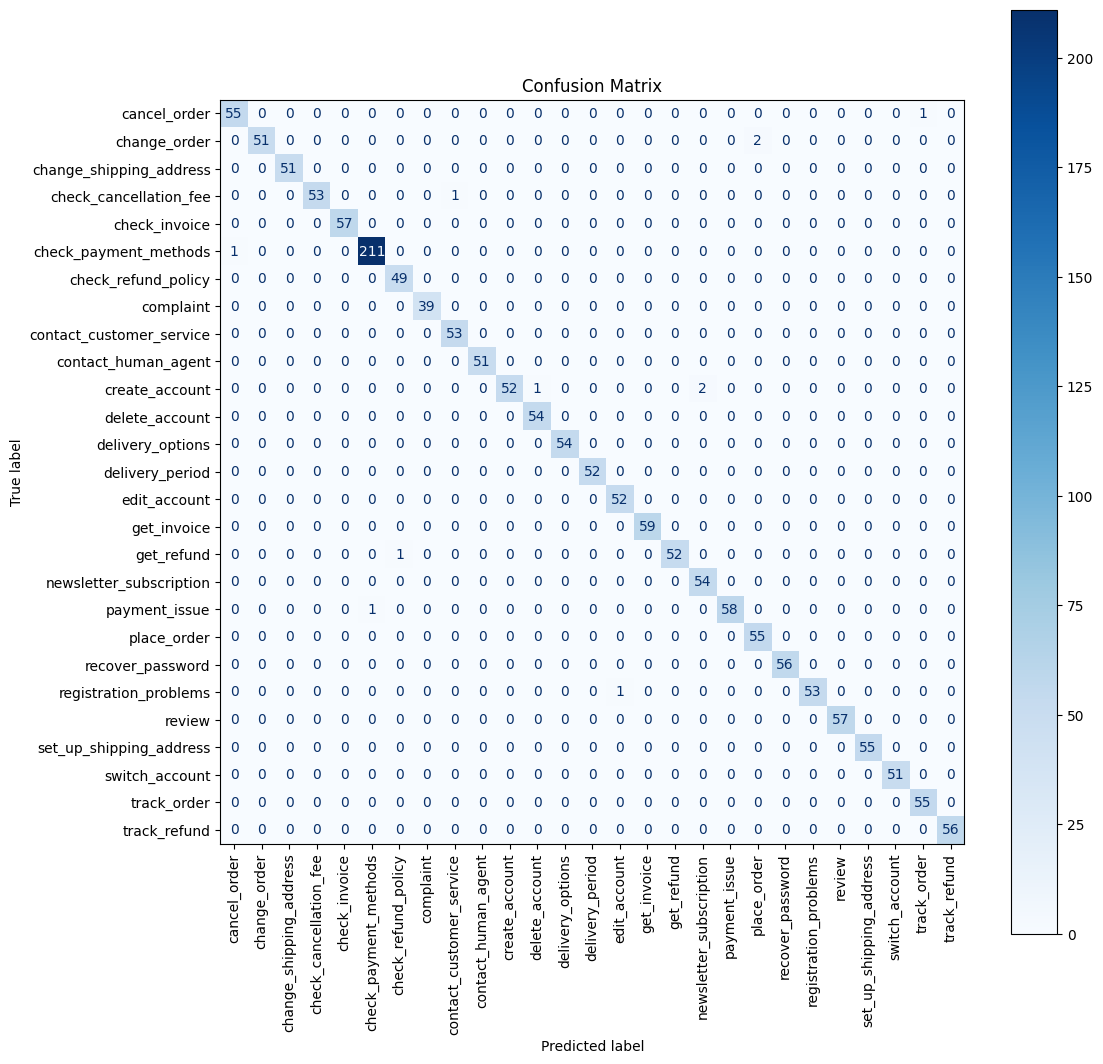

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train[:15])
print(y_train[:15])

# Latih ulang model dengan data training
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# 1. Tampilkan classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [8]:
from sklearn.metrics import log_loss

# Prediksi probabilitas data test
y_proba = model.predict_proba(X_test)

# Hitung log loss
loss = log_loss(y_test, y_proba, labels=model.classes_)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.0375


Accuracy: 0.9932
Precision: 0.9933
Recall: 0.9932
F1-Score: 0.9931
Log Loss: 0.0375


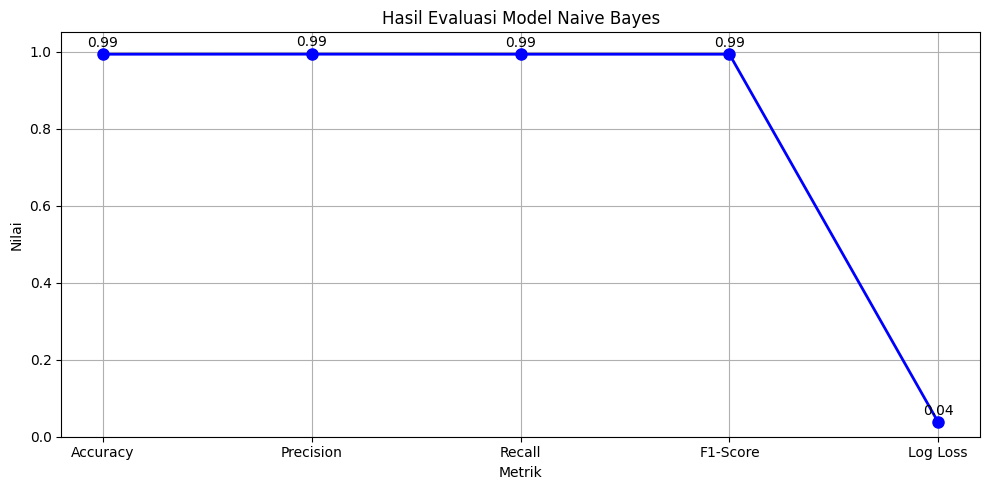

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
logloss = log_loss(y_test, y_proba, labels=model.classes_)

# Buat data untuk grafik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss']
values = [accuracy, precision, recall, f1, logloss]

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")

# Buat line plot
plt.figure(figsize=(10, 5))
plt.plot(metrics, values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('Hasil Evaluasi Model Naive Bayes')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.grid(True)

# Tentukan batas y berdasarkan log loss jika lebih besar dari 1
y_max = max(1.05, logloss + 0.1)
plt.ylim(0, y_max)

# Tampilkan nilai di atas titik
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [10]:
import pickle
with open("model_chatbot.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
